### امیرحسین مهدی‌نژاد - شماره دانشجویی ۸۱۰۸۰۰۰۵۸ - تمرین سری اول الگوریتم‌های یادگیری ماشین

# پاسخ سوال‌های اول و سوم

## اضافه کردن کتابخانه‌های مورد استفاده

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from Utiles import normalizer

## خواندن دیتاست بوستون

In [2]:
X, y = load_boston(return_X_y=True)
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## تقسیم داده‌ها به دو قسمت آموزش و آزمون

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Utiles نرمالسازی با استفاده از تابع پیاده‌سازی شده در فایل

$$y_i = \frac{x_i - \bar{x}}{\sigma}$$

In [4]:
X_train, X_test = normalizer(X_train, X_test)

## اضافه کردن ستون یک سمت چپ داده‌ها

In [5]:
X_train, X_test = np.c_[np.ones(X_train.shape[0]), X_train], np.c_[np.ones(X_test.shape[0]), X_test]
X_train

array([[ 1.        , -0.03809131,  0.67563119, ...,  0.38516431,
         0.05110808, -0.20307914],
       [ 1.        , -0.0380966 ,  0.17563119, ..., -0.18930377,
         0.09795865, -0.00932027],
       [ 1.        ,  0.04392858, -0.12436881, ...,  0.19367495,
        -0.10371567,  0.38784285],
       ...,
       [ 1.        ,  0.03138703, -0.12436881, ...,  0.19367495,
        -0.09521801,  0.14358753],
       [ 1.        , -0.03653314, -0.12436881, ...,  0.00218559,
         0.1037078 ,  0.09110526],
       [ 1.        , -0.03912841,  0.87563119, ..., -0.34887824,
         0.09362157, -0.24903658]])

## پیاده‌سازی تابع هزینه

$$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$$

In [6]:
def computeCost_MSE(X, y, theta):
    lamda = 0.001
    j = (sum((np.matmul(X, theta) - y)**2) + lamda*sum(theta[1:]**2))/(2*X.shape[0]) 
    return j

## پیاده‌سازی تابع گرادیان کاهشی

\begin{align*} & \text{Repeat}\ \lbrace \newline & \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline & \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline & \rbrace \end{align*}

$ \text{MSE} = \sum_{i=1}^{D}(x_i-y_i)^2 $



سایز بچ ۵۰ تعیین شده و در نتیجه به‌ازای هر ۵۰ نمونه، تتا تا وقوع همگرایی بروز می‌شود

In [7]:
average_theta = []
def gradientDescent_MSE(X, y, theta, alpha):
    j = []
    lamda = 0.001
    temp = np.zeros(X.shape[1])
    batchSize = 50
    batchCost = np.zeros(X.shape[1])
    rounds = 0
    while True:
        if rounds % batchSize == 0:
            temp[0] = theta[0] - alpha*(batchCost[0]+(sum(np.multiply((np.matmul(X, theta) - y),  X[:,0])/X.shape[0] +lamda*theta[0]/X.shape[0])))
            for i in range(1, X.shape[1]):
                temp[i] = theta[i] - alpha*(batchCost[i]+(sum(np.multiply((np.matmul(X, theta) - y),  X[:,i])/X.shape[0] + lamda*theta[i]/X.shape[0])))
            theta = np.array(temp)
            batchCost = np.zeros(X.shape[1])
            average_theta.append(sum(theta)/X.shape[1])
#             print(average_theta[-1])
        else:
            batchCost[0] += sum(np.multiply((np.matmul(X, theta) - y),  X[:,0]))/X.shape[0]
            for i in range(1, X.shape[1]):
                batchCost[i] += sum(np.multiply((np.matmul(X, theta) - y),  X[:,i]))/X.shape[0] + lamda*theta[i]/X.shape[0]
        rounds += 1
        j.append(computeCost_MSE(X, y, theta))
        if average_theta.__len__()>1 and abs(average_theta[-1] - average_theta[-2]) < 1e-3:
            break
#         if rounds > 1000:
#             break
    return theta, j

## مقداردهی اولیه به آلفا و تتا

In [8]:
alpha = 0.01
theta_MSE = np.zeros(X_train.shape[1]).transpose()

## فراخوانی تابع گرادیان کاهشی با مقادیر تعیین شده

In [9]:
theta_MSE, costs = gradientDescent_MSE(X_train, y_train, theta_MSE, alpha)
theta_MSE

array([ 22.2832177 ,  -3.92898191,   1.94298834,  -2.13416087,
         2.52110519,  -3.98763726,  19.8841543 ,  -0.62722218,
        -9.29965066,   3.49110118,  -4.1772112 ,  -9.85195679,
         3.14231584, -16.49235671])

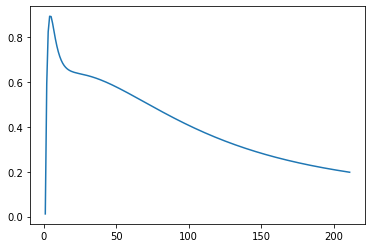

In [10]:
plt.plot([i+1 for i in range(average_theta.__len__())], average_theta)

## ترسیم نمودار هزینه

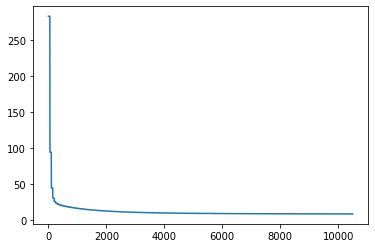

In [11]:
plt.plot([i+1 for i in range(costs.__len__())], costs)

## استفاده از کتابخانه‌های از پیش تعریف شده برای مقایسه‌ی نتایج

In [12]:
from sklearn.linear_model import LinearRegression

regr_MSE = LinearRegression()
regr_MSE.fit(X_train, y_train)
print(regr_MSE.score(X_train, y_train))
regr_MSE.coef_

0.7838092297741278


array([  0.        ,  -9.06654307,   3.4093897 ,  -0.58116699,
         2.11457119,  -6.69132266,  23.34189004,  -1.55341759,
       -13.83662506,   5.21511787,  -6.00370868,  -9.56995874,
         3.17148946, -14.10545704])

## مقادیر بدست آمده

In [13]:
computeCost_MSE(X_train, y_train, theta_MSE)

9.007395966337857

In [15]:
theta_MSE

array([ 22.2832177 ,  -3.92898191,   1.94298834,  -2.13416087,
         2.52110519,  -3.98763726,  19.8841543 ,  -0.62722218,
        -9.29965066,   3.49110118,  -4.1772112 ,  -9.85195679,
         3.14231584, -16.49235671])

## اجرا برای دیتای تست

In [16]:
computeCost_MSE(X_test, y_test, theta_MSE)

22.110109334741292

In [17]:
regr_MSE.score(X_test, y_test)

0.5601330250751301

## MAE پیاده‌سازی با

$ \text{MAE} = \sum_{i=1}^{D}|x_i-y_i|$

In [18]:
def computeCost_MAE(X, y, theta):
    lamda = 0.001
    j = (sum(abs(np.matmul(X, theta) - y)) + lamda*sum(theta[1:]**2))/(2*X.shape[0]) 
    return j

$$ \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \frac{(h_\theta(x^{(i)}) - y^{(i)})}{\text{abs}(h_\theta(x^{(i)}) - y^{(i)})} $$


$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \frac{(h_\theta(x^{(i)}) - y^{(i)}) x_j}{\text{abs}(h_\theta(x^{(i)}) - y^{(i)})} $$

In [19]:
average_theta = []
def gradientDescent_MAE(X, y, theta, alpha):
    j = []
    lamda = 0.001
    temp = np.zeros(X.shape[1])
    batchSize = 5
    batchCost = np.zeros(X.shape[1])
    rounds = 0
    while True:
        if rounds % batchSize == 0:
            temp[0] = theta[0] - alpha*(batchCost[0]+(sum(np.multiply((np.matmul(X, theta) - y),  X[:,0]))))/(X.shape[0]*sum(abs(np.matmul(X, theta) - y)))
            for i in range(1, X.shape[1]):
                temp[i] = theta[i] - alpha*(batchCost[i]+(sum(np.multiply((np.matmul(X, theta) - y),  X[:,i]))))/(X.shape[0]*sum(abs(np.matmul(X, theta) - y))) + lamda*theta[i]/X.shape[0]
            theta = np.array(temp)
            batchCost = np.zeros(X.shape[1])
            average_theta.append(sum(theta)/X.shape[1])
        else:
            batchCost[0] += sum(np.multiply((np.matmul(X, theta) - y),  X[:,0]))/(X.shape[0]*sum(abs((np.matmul(X, theta) - y))))
            for i in range(1, X.shape[1]):
                batchCost[i] += sum(np.multiply((np.matmul(X, theta) - y),  X[:,i]))/(X.shape[0]*sum(abs((np.matmul(X, theta) - y)))) + lamda*theta[i]/X.shape[0]
        rounds += 1
        j.append(computeCost_MAE(X, y, theta))
        if average_theta.__len__()>1 and abs(average_theta[-1] - average_theta[-2]) < 1e-5:
            break
    return theta, j

## فراخوانی تابع با مقادیر پیش‌فرض

In [20]:
alpha = 0.001
theta_MAE = np.zeros(X_train.shape[1]).transpose()
theta_MAE, costs = gradientDescent_MAE(X_train, y_train, theta_MAE, alpha)

In [21]:
computeCost_MAE(X_train, y_train, theta_MAE)

11.141829207919427

## مقایسه با توابع آماده

In [23]:
from sklearn.linear_model import LinearRegression, SGDRegressor

regr_MAE = SGDRegressor(epsilon=0)
regr_MAE.fit(X_train, y_train)
print(regr_MAE.score(X_train, y_train))
regr_MAE.coef_

0.7773220664409815


array([ 11.08019418,  -4.0522474 ,   1.99939549,  -2.00772862,
         2.48136188,  -4.14474642,  20.08896811,  -0.64973014,
        -9.51559677,   3.55879384,  -4.27925437,  -9.82223126,
         3.12683118, -16.46358395])

In [24]:
theta_MAE

array([ 4.95049777e-06, -7.75607167e-08,  1.98137749e-07, -2.74127105e-07,
        6.81189188e-08, -2.17646045e-07,  1.96053202e-07, -2.44043248e-07,
        1.18386537e-07, -3.25700919e-07, -3.33370578e-07, -2.60989121e-07,
        1.61238430e-07, -3.03045554e-07])

نتیجه‌ی ما واضحا بدتر بود

## اجرا برای داده‌های تست

In [25]:
computeCost_MAE(X_test, y_test, theta_MAE)

11.759801459186956

In [26]:
regr_MAE.score(X_test, y_test)

0.5508182470639431